## Star Wars Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, we'll be cleaning and exploring this data set.

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv('star_wars.csv', encoding = 'ISO-8859-1')
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data has several columns, including:

   + RespondentID - An anonymized ID for the respondent (person taking the survey)
   + Gender - The respondent's gender
   + Age - The respondent's age
   + Household Income - The respondent's income
   + Education - The respondent's education level
   + Location (Census Region) - The respondent's location
   + Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
   + Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [2]:
star_wars['RespondentID'].value_counts(dropna = False)

 3.291092e+09    1
 3.290409e+09    1
 3.290347e+09    1
 3.290351e+09    1
 3.288558e+09    1
 3.290360e+09    1
 3.290365e+09    1
 3.290372e+09    1
 3.290375e+09    1
 3.290380e+09    1
 3.290387e+09    1
 3.290399e+09    1
 3.291392e+09    1
 3.290402e+09    1
 3.290409e+09    1
 3.290412e+09    1
 3.290418e+09    1
 3.290345e+09    1
 3.290337e+09    1
 3.289919e+09    1
 3.290330e+09    1
 3.290263e+09    1
 3.290266e+09    1
 3.290407e+09    1
 3.290280e+09    1
 3.290662e+09    1
 3.290287e+09    1
 3.290289e+09    1
 3.290296e+09    1
 3.290298e+09    1
                ..
 3.288591e+09    1
 3.290655e+09    1
 3.292719e+09    1
 3.289446e+09    1
 3.292731e+09    1
 3.290597e+09    1
 3.289532e+09    1
 3.291023e+09    1
 3.292765e+09    1
 3.289986e+09    1
 3.289598e+09    1
 3.290651e+09    1
 3.292664e+09    1
 3.292654e+09    1
 3.292581e+09    1
 3.289553e+09    1
 3.289726e+09    1
 3.288640e+09    1
 3.292565e+09    1
 3.290639e+09    1
 3.292573e+09    1
 3.292583e+0

In [4]:
star_wars[star_wars['RespondentID'].isnull()]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


First, we'll need to remove the invalid rows. For example, RespondentID is supposed to be a unique ID for each respondent, but it's blank in the first row. We'll need to remove the row with an invalid RespondentID.

In [6]:
#Drop the row where RespondentID is NaN.
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars['RespondentID'].value_counts(dropna = False)

3.291092e+09    1
3.290345e+09    1
3.290351e+09    1
3.288558e+09    1
3.290360e+09    1
3.290365e+09    1
3.290372e+09    1
3.290375e+09    1
3.290380e+09    1
3.290387e+09    1
3.290399e+09    1
3.291392e+09    1
3.290402e+09    1
3.290409e+09    1
3.290412e+09    1
3.290418e+09    1
3.290423e+09    1
3.290347e+09    1
3.290409e+09    1
3.289920e+09    1
3.290337e+09    1
3.290266e+09    1
3.290407e+09    1
3.290280e+09    1
3.290662e+09    1
3.290287e+09    1
3.290289e+09    1
3.290296e+09    1
3.290298e+09    1
3.290305e+09    1
               ..
3.288591e+09    1
3.290655e+09    1
3.292719e+09    1
3.289446e+09    1
3.292731e+09    1
3.290597e+09    1
3.289532e+09    1
3.291023e+09    1
3.292765e+09    1
3.289986e+09    1
3.289598e+09    1
3.290651e+09    1
3.292664e+09    1
3.292654e+09    1
3.292581e+09    1
3.289553e+09    1
3.289726e+09    1
3.288640e+09    1
3.292565e+09    1
3.290639e+09    1
3.292573e+09    1
3.292583e+09    1
3.292640e+09    1
3.292587e+09    1
3.292597e+

## Cleaning and Mapping Yes/No Columns

Now let's take a look at the next two columns, which are:

   + Have you seen any of the 6 films in the Star Wars franchise?
   + Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Now we will convert these two columns into Boolean type.

In [10]:
yes_no = {'Yes': True,
          'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question: "Which of the following Star Wars films have you seen? Please select all that apply."

The columns for this question are:

   + Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
   + Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
   + Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
   + Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
   + Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
   + Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [11]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                         

In [12]:
#Rename the column names
dic = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
       'Unnamed: 4': 'seen_2',
       'Unnamed: 5': 'seen_3',
       'Unnamed: 6': 'seen_4',
       'Unnamed: 7': 'seen_5',
       'Unnamed: 8': 'seen_6'}
star_wars = star_wars.rename(columns = dic)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
seen_1                                                                                                                                           673 non-null object
seen_2                                                                                                                                           571 non-null object
seen_3                                                             

Then we will convert the values to Boolean type.

In [13]:
star_wars['seen_1'].value_counts(dropna = False)

Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_1, dtype: int64

In [ ]:
for i in range(1, 7):
    col_name = 'seen_{}'.format(i)
    yes_no = {star_wars[col_name].value_counts().index[0]: True,
              np.NaN: False,
              'No': False}
    star_wars[col_name] = star_wars[col_name].map(yes_no) 

In [21]:
star_wars['seen_1'].value_counts(dropna = False)

True     673
False    513
Name: seen_1, dtype: int64

Now, the columns have intuitive names, along with True and False values that indicate whether the respondent saw each of the six Star Wars movies.

## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

   + Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
   + Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
   + Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
   + Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
   + Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
   + Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We only need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [22]:
#Rename the column names
dic = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
       'Unnamed: 10': 'ranking_2',
       'Unnamed: 11': 'ranking_3',
       'Unnamed: 12': 'ranking_4',
       'Unnamed: 13': 'ranking_5',
       'Unnamed: 14': 'ranking_6'}
star_wars = star_wars.rename(columns = dic)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                      1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                      1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                             836 non-null object
seen_1                                                                                                            1186 non-null bool
seen_2                                                                                                            1186 non-null bool
seen_3                                                                                                            1186 non-null bool
seen_4                                                                                     

In [25]:
#Convert the values to numeric type
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                      1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                      1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                             836 non-null object
seen_1                                                                                                            1186 non-null bool
seen_2                                                                                                            1186 non-null bool
seen_3                                                                                                            1186 non-null bool
seen_4                                                                                     

## Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

In [27]:
#Compute the mean of each of the ranking columns.
star_wars_mean = star_wars.iloc[:, 9:15].mean()
print(star_wars_mean)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


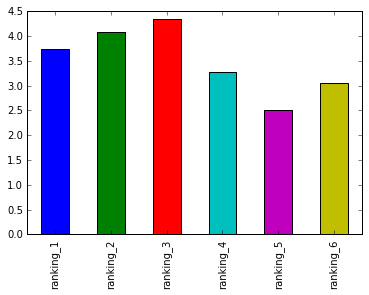

In [28]:
#Make a bar chart of each ranking
%matplotlib inline
star_wars_mean.plot.bar()

Remeber that a lower ranking is better. So Star Wars: Episode V The Empire Strikes Back got the first ranking, while the least people ranked Star Wars: Episode III Revenge of the Sith as their favorite. 

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

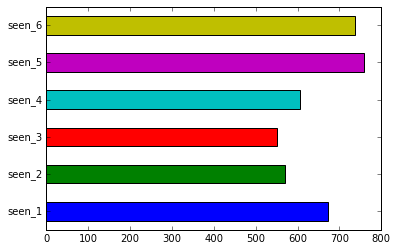

In [29]:
#Compute the sum of each of the seen columns
seen_sum = star_wars.iloc[:, 3:9].sum()
seen_sum.plot.barh()

This plot shows that most people watched the fifth and sixth episodes, while the third episode is least popular. This is consistent with our previous finding about the ranking. The ranking of the fifth episode is the highest, so the most people like to watch it.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. These results are probably differnt for different groups, such as males and females. We can split the dataframe into two groups based on a binary column by creating two subsets of that column. The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

In [30]:
star_wars['Gender'].value_counts(dropna = False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

In [31]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']
males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 1 to 1178
Data columns (total 38 columns):
RespondentID                                                                                                      497 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                      497 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                             423 non-null object
seen_1                                                                                                            497 non-null bool
seen_2                                                                                                            497 non-null bool
seen_3                                                                                                            497 non-null bool
seen_4                                                                                           

Now we can compute the most viewed movie and  the hightest-ranked movie for each group.

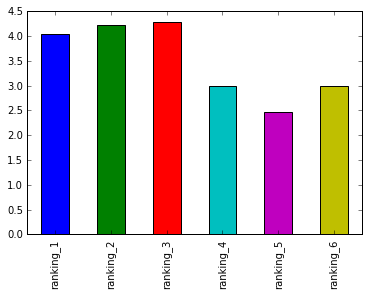

In [33]:
male_mean = males.iloc[:, 9:15].mean()
male_mean.plot.bar()

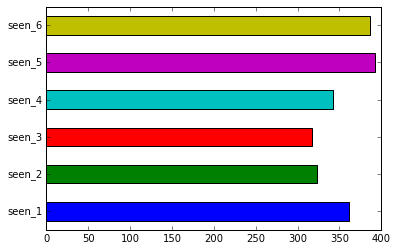

In [34]:
male_sum = males.iloc[:, 3:9].sum()
male_sum.plot.barh()

The ranking result and viewing population are the same with the whole dataframe. Then, we'll analyze the data for female group.

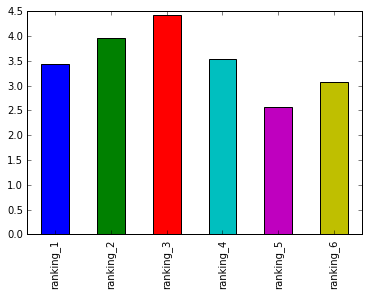

In [35]:
female_mean = females.iloc[:, 9:15].mean()
female_mean.plot.bar()

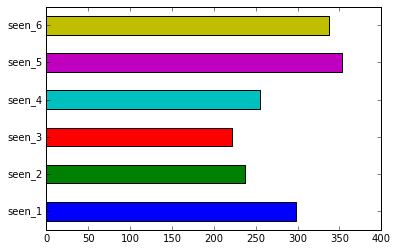

In [36]:
female_sum = females.iloc[:, 3:9].sum()
female_sum.plot.barh()

Surprisingly, there is almost no different for the preference of the star wars series between males and females.

That's it for the current project. There are also some other columns we can conduct analysis. We can try to segment the data based on columns like "Education", "Location (Census Region)", and "Which character shot first?", which aren't binary. To explore are there any interesting patterns. We will probably do this later.